## Model comparision on MNIST with KNN and Logistic 
## Logistic Regression vs KNN

In [36]:
from sklearn.datasets import load_digits

In [37]:
x = load_digits().data
y = load_digits().target

In [38]:
x.shape, y.shape

((1797, 64), (1797,))

### Import confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
x = np.random.normal(size = 300)
y = -x**2 + np.random.normal(0, .3, size = 300)

x_new = x.reshape(300, -1)
new_data = np.concatenate((x_new, x_new**2), axis =1)

In [42]:
new_data.shape

(300, 2)

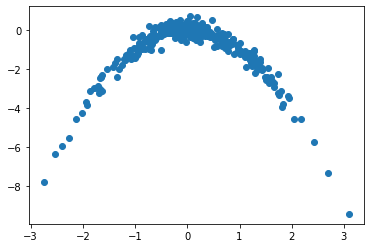

In [43]:
plt.scatter(x, y)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [45]:
model.fit(new_data, y)

LinearRegression()

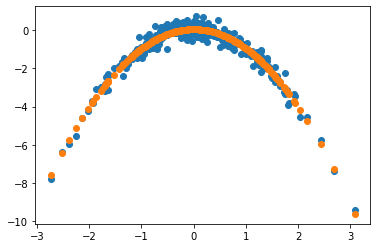

In [46]:
predicted_value = model.predict(new_data)
plt.scatter(x, y)
plt.scatter(x, predicted_value)

In [47]:
model.coef_

array([ 0.00194289, -1.01334192])

### KNN with iris dataset

In [48]:
from sklearn.datasets import load_iris
X,y = load_iris().data, load_iris().target

In [49]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
X.shape,y.shape

((150, 4), (150,))

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
import matplotlib.pyplot as plt

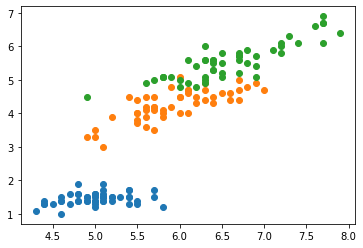

In [53]:
setosa = X[ y==0 ]
versicolor = X[ y==1 ]
verginica = X[y==2 ]

plt.scatter(setosa[:,0],setosa[:,2])
plt.scatter(versicolor[:,0],versicolor[:,2])
plt.scatter(verginica[:,0],verginica[:,2])

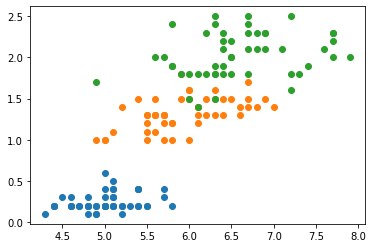

In [54]:
plt.scatter(setosa[:,0],setosa[:,3])
plt.scatter(versicolor[:,0],versicolor[:,3])
plt.scatter(verginica[:,0],verginica[:,3])

### Train test split of data

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .33)

In [56]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(100, 4)
(50, 4)
(100,)
(50,)


### Import knn

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier( n_neighbors = 5)

### Fitting or training our model with training datasets

In [58]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
knn_model.predict(X_test[10:30])

array([2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1])

In [60]:
y_test[10:30]

array([2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1])

In [61]:
predicted = knn_model.predict(X_test)
actual = y_test

count = 0
for i, j in zip(predicted, actual):
    
    if i!=j:
        count = count+1
print("percentage error is:",(count/len(actual)*100))

percentage error is: 2.0


In [62]:
knn_model.score(X_test, y_test)

0.98

In [63]:
knn_model.score(X_train,y_train)

0.96